# Data cleansing in pandas
Cleaning data is an integral component of data science, as it is an essential first step to data transformation: data cleaning improves data quality, and data transformation converts that quality raw data into a usable format for analysis.

Even the most sophisticated models may produce misleading or outright incorrect results without accurate data.

>In pandas, you can enforce various constraints to ensure the data is of high quality, consistent, and reliable.<br>
These constraints act as validation rules to detect and handle data issues like missing values, duplicates, and invalid formats.



When starting off, the most important checks you should always perform are:

## Data type constraints: 
- the consistency of dtypes of each column -- it'll help determine column dtype to be set. Cleaning for consistency paves the way for seamless data integration and streamlined analyses.
    - Use `.info()`  to check column dtypes & `.astype()` for converting to appropriate dtypes
    - This means , ensuring consistency of String values , proper formatting of datetime values
    - Additionally, we can also use `assert` to verify dtype of values

- missing or NaN values in a column -- drop columns if the no. of missing values in a column is more than threshold (~2-5% of dataframe's length). 
    - However, do check the relevance of these columns to the overall objective of the EDA & the results that we're trying to achieve.
- 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv("./ride_sharing_new.csv")
df.head()

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB
None


In [4]:
df['user_type'] = df['user_type'].astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Unnamed: 0       25760 non-null  int64   
 1   duration         25760 non-null  object  
 2   station_A_id     25760 non-null  int64   
 3   station_A_name   25760 non-null  object  
 4   station_B_id     25760 non-null  int64   
 5   station_B_name   25760 non-null  object  
 6   bike_id          25760 non-null  int64   
 7   user_type        25760 non-null  category
 8   user_birth_year  25760 non-null  int64   
 9   user_gender      25760 non-null  object  
dtypes: category(1), int64(5), object(4)
memory usage: 1.8+ MB


In [6]:
df["Unnamed: 0"].describe()

count    25760.000000
mean     12879.500000
std       7436.415803
min          0.000000
25%       6439.750000
50%      12879.500000
75%      19319.250000
max      25759.000000
Name: Unnamed: 0, dtype: float64

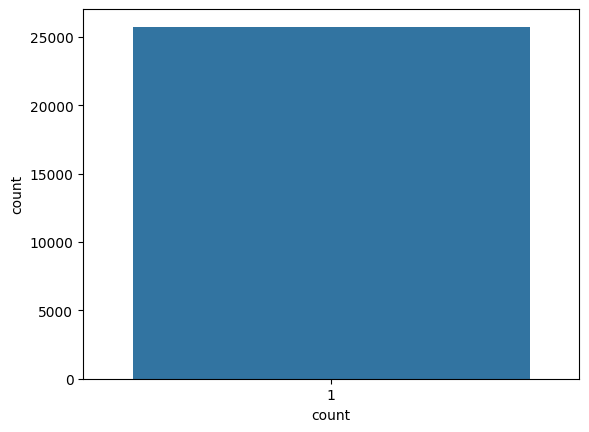

In [7]:
sns.countplot(data=df, x=df['Unnamed: 0'].value_counts())
plt.show()


### Deleting the first column

In [8]:
df.columns

Index(['Unnamed: 0', 'duration', 'station_A_id', 'station_A_name',
       'station_B_id', 'station_B_name', 'bike_id', 'user_type',
       'user_birth_year', 'user_gender'],
      dtype='object')

In [9]:
# Deleting column
df.drop(df.columns[0], axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   duration         25760 non-null  object  
 1   station_A_id     25760 non-null  int64   
 2   station_A_name   25760 non-null  object  
 3   station_B_id     25760 non-null  int64   
 4   station_B_name   25760 non-null  object  
 5   bike_id          25760 non-null  int64   
 6   user_type        25760 non-null  category
 7   user_birth_year  25760 non-null  int64   
 8   user_gender      25760 non-null  object  
dtypes: category(1), int64(4), object(4)
memory usage: 1.6+ MB


### Converting duration to correct format

In [10]:
df["duration"] = df["duration"].str.strip("minutes").astype('int')

df.head()

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,12,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,24,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,8,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,4,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,11,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male


In [11]:
df["duration"].info()

df["duration"].dtype

<class 'pandas.core.series.Series'>
RangeIndex: 25760 entries, 0 to 25759
Series name: duration
Non-Null Count  Dtype
--------------  -----
25760 non-null  int64
dtypes: int64(1)
memory usage: 201.4 KB


dtype('int64')

In [12]:
# Calculating the average ride duration 
df["duration"].mean().__round__(2)

np.float64(11.39)

# Data range constraints

Data range constraints refer to ensuring that values within a Series or DataFrame column fall within a specified minimum and maximum range. This is crucial for data integrity and quality, as out-of-range values can indicate errors, invalid inputs, or inconsistencies.

How to handle using pandas:

- **Identify invalid values**: Use boolean indexing (`.loc` can be used) to filter rows that violate the range constraints.
- **Drop the rows**: that have invalid values using the `drop` method OR 
- **Cap/clamp values**: Use the `min()`/ `max()`/ `clip()` method to set all values that are outside a given range to the range's boundaries

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   duration         25760 non-null  int64   
 1   station_A_id     25760 non-null  int64   
 2   station_A_name   25760 non-null  object  
 3   station_B_id     25760 non-null  int64   
 4   station_B_name   25760 non-null  object  
 5   bike_id          25760 non-null  int64   
 6   user_type        25760 non-null  category
 7   user_birth_year  25760 non-null  int64   
 8   user_gender      25760 non-null  object  
dtypes: category(1), int64(5), object(3)
memory usage: 1.6+ MB


In [14]:
df.head(3)

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,12,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,24,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,8,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male


In [15]:
dt.date.today()

datetime.date(2025, 9, 25)

# Uniqueness constraints
Uniqueness constraints in data analysis are rules that ensure that the values in a specified column or combination of columns within a dataset are distinct and non-repeating. They are fundamental for maintaining data integrity and accuracy, particularly in relational databases.

In [16]:
# Find the duplicate values
df[df.duplicated()]

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
604,9,81,Berry St at 4th St,81,Berry St at 4th St,1225,2,1993,Male
15217,17,22,Howard St at Beale St,102,Irwin St at 8th St,492,3,1961,Female
18303,10,30,San Francisco Caltrain (Townsend St at 4th St),6,The Embarcadero at Sansome St,4442,1,1967,Male
20170,4,21,Montgomery St BART Station (Market St at 2nd St),343,Bryant St at 2nd St,5034,2,1993,Male


In [17]:
# Pass specific arguments to the 'duplicated' method
df[df.duplicated(subset=['bike_id'],keep='first')].sort_values(by=["bike_id"])

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
6088,5,67,San Francisco Caltrain Station 2 (Townsend St...,63,Bryant St at 6th St,11,2,1985,Male
10857,4,3,Powell St BART Station (Market St at 4th St),47,4th St at Harrison St,11,1,1987,Male
21472,10,30,San Francisco Caltrain (Townsend St at 4th St),61,Howard St at 8th St,27,2,1990,Male
16104,10,22,Howard St at Beale St,30,San Francisco Caltrain (Townsend St at 4th St),27,2,1970,Male
16021,12,30,San Francisco Caltrain (Townsend St at 4th St),22,Howard St at Beale St,27,3,1989,Female
...,...,...,...,...,...,...,...,...,...
21533,1,30,San Francisco Caltrain (Townsend St at 4th St),64,5th St at Brannan St,6235,1,1990,Male
8812,10,5,Powell St BART Station (Market St at 5th St),345,Hubbell St at 16th St,6638,2,1986,Female
8456,7,67,San Francisco Caltrain Station 2 (Townsend St...,19,Post St at Kearny St,6638,1,1983,Male
8380,8,67,San Francisco Caltrain Station 2 (Townsend St...,16,Steuart St at Market St,6638,3,1984,Male


In [18]:
# finding average ride duration for each of the bike_id
# Trying to make sense of the rows with more than one occurrence of the same bike_id
for_viz = df.groupby("bike_id").agg({"duration":"mean"}).sort_values("duration", ascending=False).reset_index()
print(for_viz)
print(type(for_viz))

      bike_id    duration
0        2105  531.000000
1        1101  229.833333
2        1035  133.000000
3        5185  101.714286
4         746   81.777778
...       ...         ...
1800     2999    3.000000
1801     1088    3.000000
1802     2239    3.000000
1803     3247    2.000000
1804     1877    1.000000

[1805 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>


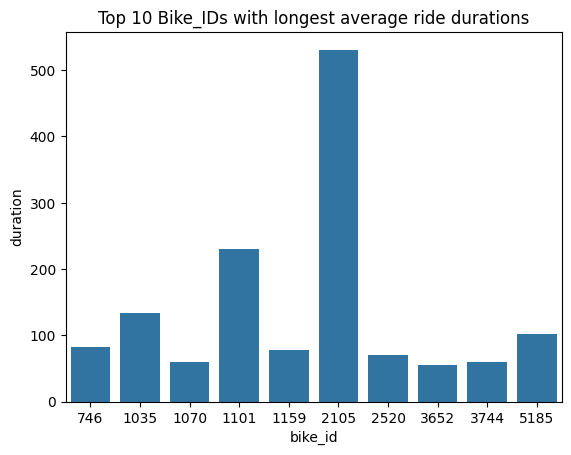

In [19]:
sns.barplot(data=for_viz.head(10), y='duration', x="bike_id")
plt.title("Top 10 Bike_IDs with longest average ride durations")
plt.show()

>The groupby result shows no duplicates. This is because any biikeID with more than one occurrence in the dataframe was rolled up into 1 single row (the average) in the resultant dataframe

In [20]:
for_viz[for_viz.duplicated()]

,bike_id,duration


In [21]:
df.loc[df['bike_id']==1225]

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
505,7,81,Berry St at 4th St,15,San Francisco Ferry Building (Harry Bridges Pl...,1225,3,1979,Male
566,9,81,Berry St at 4th St,81,Berry St at 4th St,1225,2,1993,Male
604,9,81,Berry St at 4th St,81,Berry St at 4th St,1225,2,1993,Male
4105,11,3,Powell St BART Station (Market St at 4th St),350,8th St at Brannan St,1225,3,1995,Male
8691,29,67,San Francisco Caltrain Station 2 (Townsend St...,125,20th St at Bryant St,1225,2,1981,Male
14615,9,67,San Francisco Caltrain Station 2 (Townsend St...,88,11th St at Bryant St,1225,2,1989,Female
19063,3,22,Howard St at Beale St,17,Embarcadero BART Station (Beale St at Market St),1225,3,1982,Male
20960,2,5,Powell St BART Station (Market St at 5th St),321,5th St at Folsom,1225,2,1988,Male


<Axes: xlabel='bike_id', ylabel='Count'>

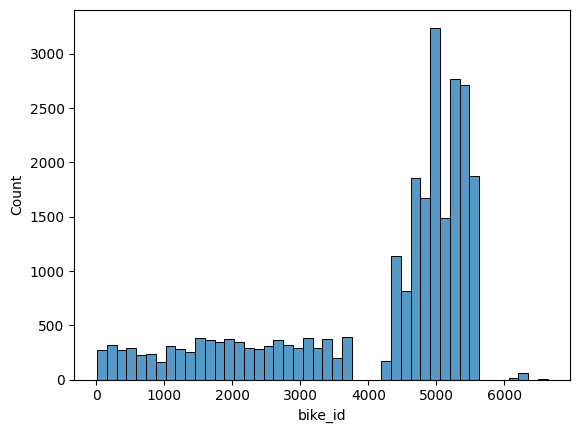

In [22]:
sns.histplot(x='bike_id', data=df)

In [23]:
df.drop_duplicates()

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,12,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,24,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,8,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,4,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,11,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male
...,...,...,...,...,...,...,...,...,...
25755,11,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5063,1,2000,Male
25756,10,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5411,2,1998,Male
25757,14,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),5157,2,1995,Male
25758,14,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),4438,2,1995,Male


# Membership constraints
Also called **Categorical contraints** - to ensure that the values in a categorical columns belong to a pre-defined set of categories.

### Where could there be inconsistencies in categrical column(s)? -
- it could be due to the categories accepting free-text entries from uses instead of providing a set of predefined responses (like a dropdown etc) 
- OR these inconsistencies could also get introduced at the time of data parsing into the database

### How to identify inconsistencies:
- Using `set`-`difference` methods to find anti-joins and/or inner-joins between the concerned categorical columns to arrive at either delta or common rows respectively.

### Addressing the inconsistencies using membership constraints:
- Dropping
- Remapping
- Inferring categories

In [24]:
a = pd.read_csv("./restaurants_L2.csv")
a.head()

,Unnamed: 0,name,addr,city,phone,type
0,0,arnie morton's of chicago,435 s. la cienega blv .,los angeles,3102461501,american
1,1,art's delicatessen,12224 ventura blvd.,studio city,8187621221,american
2,2,campanile,624 s. la brea ave.,los angeles,2139381447,american
3,3,fenix,8358 sunset blvd. west,hollywood,2138486677,american
4,4,grill on the alley,9560 dayton way,los angeles,3102760615,american


In [25]:
b = pd.read_csv("./restaurants_L2_dirty.csv")
b.head()

,Unnamed: 0,name,addr,city,phone,type
0,0,kokomo,6333 w. third st.,la,2139330773,american
1,1,feenix,8358 sunset blvd. west,hollywood,2138486677,american
2,2,parkway,510 s. arroyo pkwy .,pasadena,8187951001,californian
3,3,r-23,923 e. third st.,los angeles,2136877178,japanese
4,4,gumbo,6333 w. third st.,la,2139330358,cajun/creole


In [26]:
print(a.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  336 non-null    int64 
 1   name        336 non-null    object
 2   addr        336 non-null    object
 3   city        336 non-null    object
 4   phone       336 non-null    int64 
 5   type        336 non-null    object
dtypes: int64(2), object(4)
memory usage: 15.9+ KB
None


In [27]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  82 non-null     int64 
 1   name        82 non-null     object
 2   addr        82 non-null     object
 3   city        82 non-null     object
 4   phone       82 non-null     int64 
 5   type        82 non-null     object
dtypes: int64(2), object(4)
memory usage: 4.0+ KB


In [28]:
adf =pd.read_csv("./airlines_final.csv")
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2477 non-null   int64  
 1   id             2477 non-null   int64  
 2   day            2477 non-null   object 
 3   airline        2477 non-null   object 
 4   destination    2477 non-null   object 
 5   dest_region    2477 non-null   object 
 6   dest_size      2477 non-null   object 
 7   boarding_area  2477 non-null   object 
 8   dept_time      2477 non-null   object 
 9   wait_min       2477 non-null   float64
 10  cleanliness    2477 non-null   object 
 11  safety         2477 non-null   object 
 12  satisfaction   2477 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 251.7+ KB


## Possible errors we could encounter

- value inconsistensies
    - inconsistent fields (e.g. presence of "male" as well as "MALE" & "M" as the categorical variables) OR trailing whitespaces
    - Identify using `value_counts()` or `groupby`-`count` methods
    - Resolve using `str` methods such as `.upper` or `.lower` or `strip()` methods.
- presence of too many categories
    - too many segmentation of the data & hence presence of too many categorical variables
    - segment into categories using `pd.cut` / `pd.qcut`
    - We might also want to map categories into fewer ones: using `.replace`
- incorrect dtypes (not assigned as `category` dtype)
    - .

In [29]:
airlines = pd.read_csv('./airlines_final.csv')
airlines = airlines.drop(labels='Unnamed: 0', axis=1)
airlines.head()

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified


In [30]:
print(airlines['dest_region'].unique())
print("\n")
print(airlines['dest_size'].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']


['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


In [31]:
# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower() 
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


In [32]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2477 non-null   int64  
 1   day            2477 non-null   object 
 2   airline        2477 non-null   object 
 3   destination    2477 non-null   object 
 4   dest_region    2477 non-null   object 
 5   dest_size      2477 non-null   object 
 6   boarding_area  2477 non-null   object 
 7   dept_time      2477 non-null   object 
 8   wait_min       2477 non-null   float64
 9   cleanliness    2477 non-null   object 
 10  safety         2477 non-null   object 
 11  satisfaction   2477 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 232.3+ KB


In [33]:
# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower() 
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

In [34]:
# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

In [35]:
airlines.head()

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction,wait_type,day_week
0,1351,Tuesday,UNITED INTL,KANSAI,asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied,medium,weekday
1,373,Friday,ALASKA,SAN JOSE DEL CABO,canada/mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied,medium,weekday
2,2820,Thursday,DELTA,LOS ANGELES,west us,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral,medium,weekday
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,west us,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified,long,weekday
4,2992,Wednesday,AMERICAN,MIAMI,east us,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified,long,weekday


In [36]:
import seaborn as sns

<Axes: >

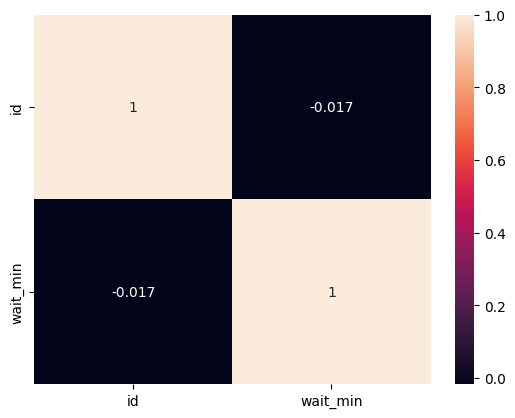

In [37]:
sns.heatmap(data=airlines.corr(numeric_only=True), annot=True)

# Cleaning text data
- Inconsistent data formats: contact no.s having '0096' as well as '+96' in their column values
- Fixed length violations: one or several entries don't match the general format
- Typos

Identify using `str.len()` , `str.contains()` , `str.startswith()` etc. Filter using `.loc`

Regular expressions are also used -- 

Most of these are resolved by using `str.replace()` / assigning `np.nan` / 

# Unit Uniformity
- Ensuring all values have the same unit.

- Ensuring all the dates have same format using `errors='coerce'` in the `pd.to_datetime` that will return NaN/ NaT for row values with invalid date format.
    - Date formats can be set using `df['col'].dt.strftime("%d-%m-%Y)`


______________
# Cross field validation
Its the process of using multiple columns (fields) in a DataFrame to check and ensure the integrity, consistency, and correctness of the data. 

Rather than checking a single column in isolation, you create a rule based on the relationships between different fields in the same row.

### Common Methods include: 
- Calculating sum (or could be any other math operation) across rows & comparing value with their `'total'` column 
- OR Using assertions

In [38]:
data = {
    'economy_passengers': [150, 100, 200, 180],
    'business_passengers': [30, 20, 40, 25],
    'first_class_passengers': [10, 5, 8, 10],
    'total_passengers': [190, 125, 248, 210] # Note the inconsistency in the third row
}

df = pd.DataFrame(data)

In [39]:
# Create a new Series with the calculated sum for each row
calculated_total = df['economy_passengers'] + df['business_passengers'] + df['first_class_passengers']

# Compare the calculated total with the existing total_passengers column
inconsistencies = calculated_total != df['total_passengers']


### Results of cross-validation
Now, Filtering all rows where the validation fails

In [40]:
# Notice total_passengers does not match the sum of individual passenger classes
df[inconsistencies]

,economy_passengers,business_passengers,first_class_passengers,total_passengers
3,180,25,10,210


Comparing with the dataframe, we can see spot the inconsistency clearly -- **The row sum DOES NOT equal to 215**

In [41]:
df

,economy_passengers,business_passengers,first_class_passengers,total_passengers
0,150,30,10,190
1,100,20,5,125
2,200,40,8,248
3,180,25,10,210


### Checking all values that are OK
>This depends on what is the nature of your cross field check -- is it finding inconsistent values? OR <br>
is it finding the sane values from the dataframe

In [42]:
df[~inconsistencies]

,economy_passengers,business_passengers,first_class_passengers,total_passengers
0,150,30,10,190
1,100,20,5,125
2,200,40,8,248


### How to address the results of cross-field validation
- Either by dropping data
- Set to missing & impute 
- Apply rules from domain knowledge

_____
### TEST QUESTION
the `banking` DataFrame contains details on how investments in the `inv_amount` column are allocated across four different funds A, B, C and D.

You want to understand how customers of different age groups invest. However, you want to first make sure the data you're analyzing is correct.<br>
You will do so by cross field checking values of `inv_amount` and age against the amount invested in different funds and customers' birthdays.

Furthermore, the age and birthdays of customers are now stored in the age and birth_date columns respectively.

In [43]:
banking = pd.read_csv('./banking_dirty.csv')
banking.head()

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18


In [44]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        100 non-null    int64  
 1   cust_id           100 non-null    object 
 2   birth_date        100 non-null    object 
 3   Age               100 non-null    int64  
 4   acct_amount       100 non-null    float64
 5   inv_amount        100 non-null    int64  
 6   fund_A            100 non-null    float64
 7   fund_B            100 non-null    float64
 8   fund_C            100 non-null    float64
 9   fund_D            100 non-null    float64
 10  account_opened    100 non-null    object 
 11  last_transaction  100 non-null    object 
dtypes: float64(5), int64(3), object(4)
memory usage: 9.5+ KB


In [45]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis=1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[~inv_equ]
inconsistent_inv = banking[inv_equ]

In [46]:
consistent_inv

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
4,4,7A73F334,1990-05-17,30,120512.00,93230,12158.40,51281.00,13434.00,18383.00,14-05-18,19-07-18
12,12,EEBD980F,1990-11-20,34,57838.49,50812,18314.00,1477.00,29049.48,5539.00,08-12-18,04-01-20
22,22,96525DA6,1992-11-23,28,82511.24,33927,8206.00,15019.00,5559.60,6182.00,23-07-18,07-08-18
43,43,38B8CD9C,1970-06-25,50,28834.71,27531,314.00,6072.28,14163.00,7908.00,17-09-18,05-02-20
47,47,68C55974,1962-07-08,58,95038.14,66796,33764.00,5042.00,10659.00,19237.41,03-04-18,25-09-18
65,65,0A9BA907,1966-09-21,54,90469.53,70171,28615.00,21720.05,11906.00,10763.00,15-06-18,28-08-18
89,89,C580AE41,1968-06-01,52,96673.37,68466,8489.36,28592.00,2439.00,30419.00,28-09-18,17-09-18
92,92,A07D5C92,1990-09-20,30,99577.36,60407,6467.00,20861.00,9861.00,26004.16,17-11-17,16-01-20


In [47]:
inconsistent_inv

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
5,5,472341F2,1980-02-23,40,83127.65,67960,12686.0,19776.0,23707.0,11791.0,14-12-18,22-04-18
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,CA507BA1,1974-08-10,46,12209.84,7515,190.0,931.0,1451.0,4943.0,26-05-18,11-09-19
96,96,B99CD662,1989-12-12,31,92838.44,49089,2453.0,7892.0,31486.0,7258.0,04-05-17,12-03-19
97,97,13770971,1984-11-29,36,92750.87,27962,3352.0,7547.0,8486.0,8577.0,16-08-17,24-04-19
98,98,93E78DA3,1969-12-14,51,41942.23,29662,1758.0,11174.0,11650.0,5080.0,09-10-17,15-04-18


NOW cross checking the validity of birthdates

In [48]:
today = dt.date.today()

In [49]:
# Recasting birth_date to appropriate dtype
banking['birth_date'] = pd.to_datetime(banking['birth_date'])
banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        100 non-null    int64         
 1   cust_id           100 non-null    object        
 2   birth_date        100 non-null    datetime64[ns]
 3   Age               100 non-null    int64         
 4   acct_amount       100 non-null    float64       
 5   inv_amount        100 non-null    int64         
 6   fund_A            100 non-null    float64       
 7   fund_B            100 non-null    float64       
 8   fund_C            100 non-null    float64       
 9   fund_D            100 non-null    float64       
 10  account_opened    100 non-null    object        
 11  last_transaction  100 non-null    object        
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 9.5+ KB


In [50]:
# Calulating customer age
ages_manual = today.year - banking['birth_date'].dt.year
print(type(ages_manual))

<class 'pandas.core.series.Series'>


In [51]:
ages_manual

0     63
1     63
2     35
3     40
4     35
      ..
95    51
96    36
97    41
98    56
99    32
Name: birth_date, Length: 100, dtype: int32

In [52]:
banking['Age']

0     58
1     58
2     34
3     35
4     30
      ..
95    46
96    31
97    36
98    51
99    27
Name: Age, Length: 100, dtype: int64

In [53]:
# NOW validating age entries with calculated age values -- Find rows where age column == ages_manual
age_equ = ages_manual == banking["Age"]


In [54]:
age_equ.value_counts()

False    100
Name: count, dtype: int64

In [55]:
consistent_age = banking[age_equ]
print(consistent_age)

Empty DataFrame
Columns: [Unnamed: 0, cust_id, birth_date, Age, acct_amount, inv_amount, fund_A, fund_B, fund_C, fund_D, account_opened, last_transaction]
Index: []


In [56]:
banking[~age_equ]

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,CA507BA1,1974-08-10,46,12209.84,7515,190.0,931.0,1451.0,4943.0,26-05-18,11-09-19
96,96,B99CD662,1989-12-12,31,92838.44,49089,2453.0,7892.0,31486.0,7258.0,04-05-17,12-03-19
97,97,13770971,1984-11-29,36,92750.87,27962,3352.0,7547.0,8486.0,8577.0,16-08-17,24-04-19
98,98,93E78DA3,1969-12-14,51,41942.23,29662,1758.0,11174.0,11650.0,5080.0,09-10-17,15-04-18


In this case, it's best to investigate the underlying data sources before deciding on a course of action!

# Missing data

Represented mostly as `NaN` (or NaT or NA) - occurs when there's no data value stored for a variable in an observation

Use of `df.isna()` that returns TRUE for missing / NaN values, while the `df.isna().sum()` method will give a summary. 

We can also use `missingno` package to visualize missing data.


### Types of Missing data
- MCAR (Missing Completely at random) - 

- MAR (Missing at random) - in an academic performance survey, students with higher grades might be less likely to disclose information about the number of hours they study (due to competition, maybe).

- NMAR (Not Missing at random) - For instance, in a health survey, participants with very high stress levels might consciously choose not to disclose their stress level due to stigma, or fear of judgment. As a result, the missing data on stress level is not random; it is influenced by the stress level itself.

>[Article on randomness in missing data](https://blog.dailydoseofds.com/p/3-types-of-missing-values)


## How to deal with missing data
Simple methods:
- Dropping missing data (`.dropna()`)
- Imputing with statistical measures(mean/ median etc.) (`.fillna()`)

Complex methods:
- Imputing using an algorithmic approach
- Imputing with M models

In [57]:
import missingno as msno

In [58]:
banking.isna().sum()

Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64

# Record Linkage
### String Similarity & Minimum Edit distance:
Popular libraries used to calulate minimum edit distance `nltk` , `thefuzz` , `textdistance`


In [59]:
from thefuzz import fuzz

from thefuzz import process

the `fuzz` module is a more versatile and robust weighted ratio that handles upper/lower cases and other parameters, often providing more reliable results than the simpler `thefuzz.ratio()`. 
>The higher the Weighted ratio , the stronger is the match

In [60]:
fuzz.WRatio("Reel","Real")

75

In [61]:
banking.head()

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18


### The `fuzz.process`
module provides convenient functions for applying fuzzy matching algorithms to lists of choices, making it easier to find the best matches for a given query string within a collection of potential.


`process.extract('string',`_`list`_ `, limit=`_`no. of approx matches to be returned)`_

Output is >>> 

In [62]:
# Import process
from thefuzz import process
# Define string and array of possible matches
string = "Houston Rockets vs Los Angeles Lakers"
choices = pd.Series(['Rockets vs Lakers', 'Lakers vs Rockets', 'Houson vs Los Angeles', 'Heat vs Bulls'])
process.extract(string, choices, limit = 2)

[('Rockets vs Lakers', 86, 0), ('Lakers vs Rockets', 86, 1)]

In [63]:
restaurants = pd.read_csv('./restaurants_L2.csv').drop(['Unnamed: 0'],axis=1)
restaurants.head()

,name,addr,city,phone,type
0,arnie morton's of chicago,435 s. la cienega blv .,los angeles,3102461501,american
1,art's delicatessen,12224 ventura blvd.,studio city,8187621221,american
2,campanile,624 s. la brea ave.,los angeles,2139381447,american
3,fenix,8358 sunset blvd. west,hollywood,2138486677,american
4,grill on the alley,9560 dayton way,los angeles,3102760615,american


In [64]:
restaurants['city'].value_counts()

city
new york             173
san francisco         55
los angeles           40
atlanta               33
las vegas             20
santa monica           6
beverly hills          2
studio city            1
hollywood              1
brooklyn               1
pacific palisades      1
toluca lake            1
sherman oaks           1
los feliz              1
Name: count, dtype: int64

In [65]:
rides = pd.read_csv('./ride_sharing_new.csv').drop(['Unnamed: 0'],axis=1)
rides.head()

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male


In [66]:
rides['station_A_name'].value_counts().sort_index()

station_A_name
Berry St at 4th St                                           3030
Howard St at Beale St                                        2561
Montgomery St BART Station (Market St at 2nd St)             2998
Powell St BART Station (Market St at 4th St)                 2899
Powell St BART Station (Market St at 5th St)                 2386
San Francisco Caltrain (Townsend St at 4th St)               2933
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3635
San Francisco Ferry Building (Harry Bridges Plaza)           2812
Steuart St at Market St                                      2506
Name: count, dtype: int64

_____
## Process for `recordLinkage` 
>### Indexing (blocking) ➡️ Comparing ➡️ Classification

In [67]:
# Dataset 1
df1 = pd.DataFrame({
    "customer_id": range(1, 11),
    "first_name": ["Alice", "Bob", "Charlie", "David", "Eva", 
                   "Frank", "Grace", "Hannah", "Ian", "Julia"],
    "last_name": ["Smith", "Brown", "Johnson", "Wilson", "Taylor", 
                  "Miller", "Davis", "Moore", "Clark", "Lee"],
    "city": ["New York", "Los Angeles", "Chicago", "Houston", "Phoenix", 
             "San Diego", "Dallas", "Austin", "San Jose", "Boston"],
    "email": [
        "alice.smith@example.com","bob.brown@example.com",
        "charlie.j@example.com", "david.w@example.com",
        "eva.taylor@example.com","frank.miller@example.com",
        "grace.davis@example.com","hannah.moore@example.com",
        "ian.clark@example.com","julia.lee@example.com"
    ]
})

# Messy dataset (20 rows, includes duplicates with variations)
# Messy dataset (15 rows, includes duplicates/variations)
df2 = pd.DataFrame({
    "customer_id": range(101, 116),
    "first_name": [
        "Alicia", "Alice", "Bobby", "Charlie", "Charly", 
        "Dave", "Eva", "Eve", "Frank", "Franklin", 
        "Grace", "Hanna", "Ian", "Iain", "Julie"
    ],
    "last_name": [
        "Smith", "Smyth", "Brown", "Johnson", "Johnsen", 
        "Wilson", "Taylor", "Tailor", "Miller", "Muller", 
        "Davis", "Moore", "Clark", "Clarke", "Lee"
    ],
    "city": [
        "New York", "New York", "Los Angeles", "Chicago", "Chicago", 
        "Houston", "Phoenix", "Phoenix", "San Diego", "San Diego", 
        "Dallas", "Austin", "San Jose", "San Jose", "Boston"
    ],
    "email": [
        "alice.s@example.com", "a.smith@example.com", 
        "bobby.b@example.com", "charlie.johnson@example.com", "charly.j@example.com", 
        "dave.w@example.com", "eva.t@example.com", "eve.taylor@example.com", 
        "frank.m@example.com", "franklin.muller@example.com", 
        "grace.d@example.com", "hanna.moore@example.com", 
        "ian.c@example.com", "iain.clark@example.com", "julie.lee@example.com"
    ]
})


print("Dataset 1:\n", df1, "\n\nDataset 2:\n", df2)

Dataset 1:
    customer_id first_name last_name         city                     email
0            1      Alice     Smith     New York   alice.smith@example.com
1            2        Bob     Brown  Los Angeles     bob.brown@example.com
2            3    Charlie   Johnson      Chicago     charlie.j@example.com
3            4      David    Wilson      Houston       david.w@example.com
4            5        Eva    Taylor      Phoenix    eva.taylor@example.com
5            6      Frank    Miller    San Diego  frank.miller@example.com
6            7      Grace     Davis       Dallas   grace.davis@example.com
7            8     Hannah     Moore       Austin  hannah.moore@example.com
8            9        Ian     Clark     San Jose     ian.clark@example.com
9           10      Julia       Lee       Boston     julia.lee@example.com 

Dataset 2:
     customer_id first_name last_name         city                        email
0           101     Alicia     Smith     New York          alice.s@exa

In [68]:
# Importing the recordlinkage library
import recordlinkage
# Initiating an indexing object
indexer = recordlinkage.Index()
# Adding indexing method (blocking used in this case)
indexer.block('city')

<Index>

In [69]:
# Generating candidate pairs
pairs = indexer.index(df1, df2)
print(pairs)

MultiIndex([(0,  0),
            (0,  1),
            (1,  2),
            (2,  3),
            (2,  4),
            (3,  5),
            (4,  6),
            (4,  7),
            (5,  8),
            (5,  9),
            (6, 10),
            (7, 11),
            (8, 12),
            (8, 13),
            (9, 14)],
           )


In [70]:
# Initiating a compare object
compare = recordlinkage.Compare()
# Adding comparisons for different fields
compare.string('first_name','first_name',threshold=0.70, label='first_name_res')
compare.string('last_name','last_name',threshold=0.70, label='last_name_res')
compare.string('email','email',threshold=0.60, label='email_res')
compare.string('city','city',threshold=0.80, label='city_res')

<Compare>

In [71]:
# Compute comparison vectors -- 1 for match & 0 for no match
potentials = compare.compute(pairs=pairs,x=df1, x_link=df2)
potentials

first_name_res  last_name_res  email_res  city_res
0 0              0.0            1.0        1.0       1.0
  1              1.0            1.0        1.0       1.0
1 2              0.0            1.0        1.0       1.0
2 3              1.0            1.0        1.0       1.0
  4              1.0            1.0        1.0       1.0
3 5              0.0            1.0        1.0       1.0
4 6              1.0            1.0        1.0       1.0
  7              0.0            1.0        1.0       1.0
5 8              1.0            1.0        1.0       1.0
  9              0.0            1.0        1.0       1.0
6 10             1.0            1.0        1.0       1.0
7 11             1.0            1.0        1.0       1.0
8 12             1.0            1.0        1.0       1.0
  13             1.0            1.0        1.0       1.0
9 14             1.0            1.0        1.0       1.0

Finding only pairs with highest matches across all columns

In [72]:
# Then chose a Classification method ; used threshold-level in this case
# Row sum is more than 3 meaning it all the columns are matching their respective criteria
matches = potentials[potentials.sum(axis=1)>3]
matches

first_name_res  last_name_res  email_res  city_res
0 1              1.0            1.0        1.0       1.0
2 3              1.0            1.0        1.0       1.0
  4              1.0            1.0        1.0       1.0
4 6              1.0            1.0        1.0       1.0
5 8              1.0            1.0        1.0       1.0
6 10             1.0            1.0        1.0       1.0
7 11             1.0            1.0        1.0       1.0
8 12             1.0            1.0        1.0       1.0
  13             1.0            1.0        1.0       1.0
9 14             1.0            1.0        1.0       1.0

## Linking the dataframes
>### Indexing (blocking) ➡️ Comparing ➡️ Classification **➡️ Link data**

After finding out the potetial matches array, we picked only those candidates with high score of duplicacy score i.e. the `matches` score.



In [73]:
duplicate_rows = matches.index.get_level_values(1)
duplicate_rows

Index([1, 3, 4, 6, 8, 10, 11, 12, 13, 14], dtype='int64')

In [74]:
# Filter out all duplicates in df2
df2[df2.index.isin(duplicate_rows)]

,customer_id,first_name,last_name,city,email
1,102,Alice,Smyth,New York,a.smith@example.com
3,104,Charlie,Johnson,Chicago,charlie.johnson@example.com
4,105,Charly,Johnsen,Chicago,charly.j@example.com
6,107,Eva,Taylor,Phoenix,eva.t@example.com
8,109,Frank,Miller,San Diego,frank.m@example.com
10,111,Grace,Davis,Dallas,grace.d@example.com
11,112,Hanna,Moore,Austin,hanna.moore@example.com
12,113,Ian,Clark,San Jose,ian.c@example.com
13,114,Iain,Clarke,San Jose,iain.clark@example.com
14,115,Julie,Lee,Boston,julie.lee@example.com


In [75]:
# Filter out unique rows in df2
unique_rows = df2[~df2.index.isin(duplicate_rows)]
unique_rows

,customer_id,first_name,last_name,city,email
0,101,Alicia,Smith,New York,alice.s@example.com
2,103,Bobby,Brown,Los Angeles,bobby.b@example.com
5,106,Dave,Wilson,Houston,dave.w@example.com
7,108,Eve,Tailor,Phoenix,eve.taylor@example.com
9,110,Franklin,Muller,San Diego,franklin.muller@example.com


In [76]:
# Finally! linking df1 with unique rows of df2

pd.concat([df1,unique_rows]) 

,customer_id,first_name,last_name,city,email
0,1,Alice,Smith,New York,alice.smith@example.com
1,2,Bob,Brown,Los Angeles,bob.brown@example.com
2,3,Charlie,Johnson,Chicago,charlie.j@example.com
3,4,David,Wilson,Houston,david.w@example.com
4,5,Eva,Taylor,Phoenix,eva.taylor@example.com
5,6,Frank,Miller,San Diego,frank.miller@example.com
6,7,Grace,Davis,Dallas,grace.davis@example.com
7,8,Hannah,Moore,Austin,hannah.moore@example.com
8,9,Ian,Clark,San Jose,ian.clark@example.com
9,10,Julia,Lee,Boston,julia.lee@example.com


Notice that with the above steps, we're able to:
- identify duplicates based on string similarity (`.compare` method)

- discard them from DF2 & only consider unique values

- then join these DF2_unique rows into DF1 for further processing

In [77]:
print("Dataset 1:\n", df1, "\n\nDataset 2:\n", df2)

Dataset 1:
    customer_id first_name last_name         city                     email
0            1      Alice     Smith     New York   alice.smith@example.com
1            2        Bob     Brown  Los Angeles     bob.brown@example.com
2            3    Charlie   Johnson      Chicago     charlie.j@example.com
3            4      David    Wilson      Houston       david.w@example.com
4            5        Eva    Taylor      Phoenix    eva.taylor@example.com
5            6      Frank    Miller    San Diego  frank.miller@example.com
6            7      Grace     Davis       Dallas   grace.davis@example.com
7            8     Hannah     Moore       Austin  hannah.moore@example.com
8            9        Ian     Clark     San Jose     ian.clark@example.com
9           10      Julia       Lee       Boston     julia.lee@example.com 

Dataset 2:
     customer_id first_name last_name         city                        email
0           101     Alicia     Smith     New York          alice.s@exa